# Student Marks Prediction

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('student_marks.csv')

In [3]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

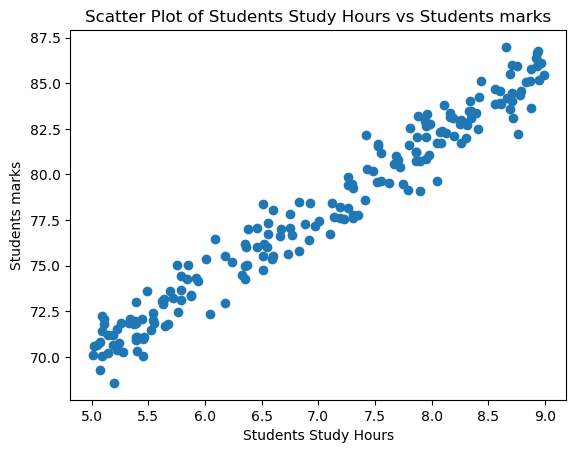

In [7]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [ ]:
# Data Cleaning

In [8]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
df.study_hours.mean()

6.9959487179487185

In [10]:
df2 = df.fillna(df.study_hours.mean())

In [11]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
# split dataset

In [12]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [15]:
X_train

,study_hours
152,8.08
1,6.56
101,7.95
157,6.18
84,6.88
...,...
114,7.12
137,5.14
76,5.11
115,5.79


In [16]:
y_train

152    81.70
1      76.74
101    82.03
157    75.52
84     77.29
       ...  
114    78.42
137    71.22
76     72.08
115    74.44
153    70.78
Name: student_marks, Length: 160, dtype: float64

In [17]:
X_test

,study_hours
91,8.200000
166,7.800000
190,5.790000
178,8.420000
11,8.560000
2,6.995949
167,5.070000
67,8.260000
86,5.880000
78,5.090000


In [18]:
y_test

91     82.10
166    81.60
190    73.14
178    84.24
11     83.88
2      78.68
167    70.79
67     81.70
86     73.40
78     70.05
121    82.69
80     84.00
177    73.64
125    85.95
180    77.19
188    77.27
105    77.07
66     81.25
151    76.70
160    80.81
28     74.15
191    70.51
10     75.37
51     77.77
93     79.10
34     83.08
43     82.84
119    75.55
175    71.11
57     86.65
40     70.27
130    73.19
21     83.36
15     76.03
111    75.04
179    78.17
108    74.25
100    75.18
159    80.72
53     71.45
Name: student_marks, dtype: float64

# Select a model and train it

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
lr.coef_

array([3.88848522])

In [21]:
lr.intercept_

50.77141161923032

In [ ]:
m = 3.92759224
c = 50.41547425152682
z  = m * 40 + c 
z

In [ ]:
lr.predict([[40]])

In [23]:
y_pred  = lr.predict(X_test)
y_pred

array([82.65699045, 81.10159636, 73.28574106, 83.5124572 , 84.05684513,
       77.97505483, 70.4860317 , 82.89029956, 73.63570473, 70.5638014 ,
       83.08472382, 83.20137838, 73.28574106, 84.79565732, 77.87415362,
       77.97505483, 75.89102616, 81.33490547, 77.09645658, 80.71274784,
       73.86901384, 71.06930448, 76.39652924, 79.1962386 , 81.49044488,
       84.67900276, 83.04583897, 76.43541409, 71.73034697, 85.49558466,
       71.3026136 , 72.70246828, 82.50145104, 76.24098983, 75.54106249,
       79.00181434, 73.48016532, 75.03555941, 81.33490547, 72.23585005])

In [24]:
temp = np.c_[X_test, y_test, y_pred]
temp

array([[ 8.2       , 82.1       , 82.65699045],
       [ 7.8       , 81.6       , 81.10159636],
       [ 5.79      , 73.14      , 73.28574106],
       [ 8.42      , 84.24      , 83.5124572 ],
       [ 8.56      , 83.88      , 84.05684513],
       [ 6.99594872, 78.68      , 77.97505483],
       [ 5.07      , 70.79      , 70.4860317 ],
       [ 8.26      , 81.7       , 82.89029956],
       [ 5.88      , 73.4       , 73.63570473],
       [ 5.09      , 70.05      , 70.5638014 ],
       [ 8.31      , 82.69      , 83.08472382],
       [ 8.34      , 84.        , 83.20137838],
       [ 5.79      , 73.64      , 73.28574106],
       [ 8.75      , 85.95      , 84.79565732],
       [ 6.97      , 77.19      , 77.87415362],
       [ 6.99594872, 77.27      , 77.97505483],
       [ 6.46      , 77.07      , 75.89102616],
       [ 7.86      , 81.25      , 81.33490547],
       [ 6.77      , 76.7       , 77.09645658],
       [ 7.7       , 80.81      , 80.71274784],
       [ 5.94      , 74.15      , 73.869

In [25]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.200000,82.10,82.656990
1,7.800000,81.60,81.101596
2,5.790000,73.14,73.285741
3,8.420000,84.24,83.512457
4,8.560000,83.88,84.056845
5,6.995949,78.68,77.975055
6,5.070000,70.79,70.486032
7,8.260000,81.70,82.890300
8,5.880000,73.40,73.635705
9,5.090000,70.05,70.563801


## Fine-tune your model

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
mean_squared_error(y_test,y_pred)

0.6794776628178256

In [29]:
r2_score(y_test,y_pred)

0.9694794592054993

In [26]:
lr.score(X_test,y_test)

0.9694794592054993

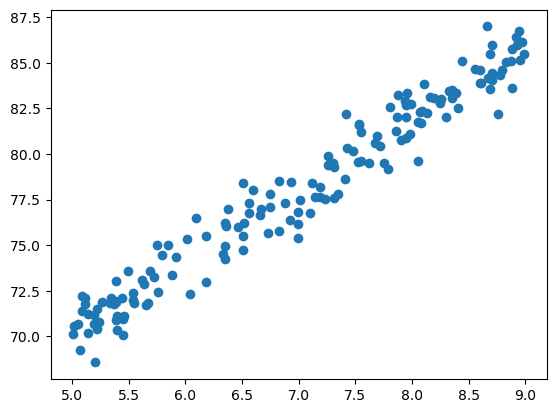

In [30]:
plt.scatter(X_train,y_train)  

In [31]:
lr.predict(X_train)

array([82.19037222, 76.27987468, 81.68486914, 74.8022503 , 77.52418995,
       79.85728109, 75.57994734, 74.25786237, 73.63570473, 84.56234821,
       81.14048121, 71.06930448, 81.72375399, 83.47357234, 72.66358342,
       82.89029956, 84.25126939, 70.5638014 , 84.4845785 , 80.9071721 ,
       80.12947505, 84.21238454, 71.06930448, 84.91231188, 80.40166902,
       78.72962037, 79.1962386 , 82.50145104, 70.5638014 , 73.79124414,
       76.27987468, 77.32976569, 83.04583897, 80.67386298, 70.25272259,
       84.21238454, 77.01868687, 82.38479648, 75.50217764, 77.97505483,
       84.44569365, 82.22925707, 70.64157111, 71.69146212, 84.64011791,
       80.59609328, 76.70760806, 84.56234821, 85.3011604 , 82.15148737,
       81.06271151, 71.73034697, 71.96365608, 81.41267518, 70.95264993,
       72.81912283, 85.72889377, 77.97505483, 84.64011791, 70.75822566,
       75.46329278, 84.95119673, 71.65257727, 71.76923182, 85.26227555,
       80.12947505, 84.64011791, 75.89102616, 85.3011604 , 70.48

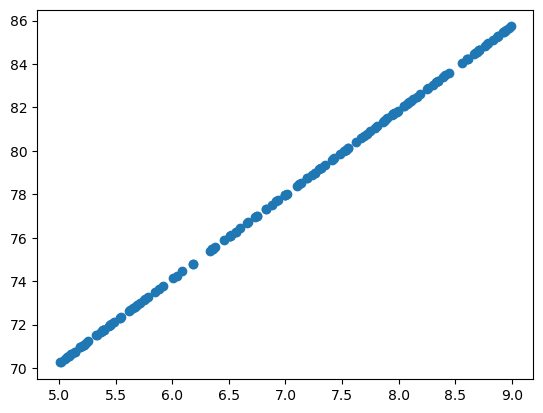

In [32]:
plt.scatter(X_train, lr.predict(X_train))

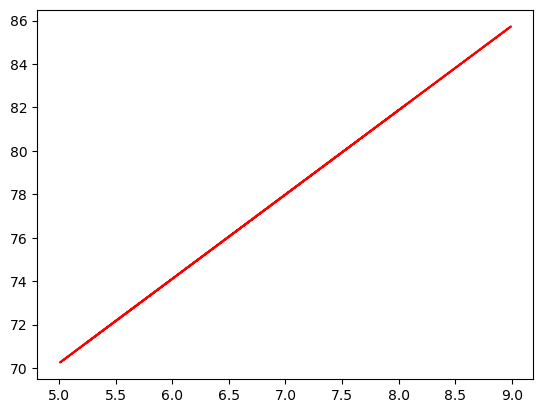

In [33]:
plt.plot(X_train, lr.predict(X_train), 'r-')

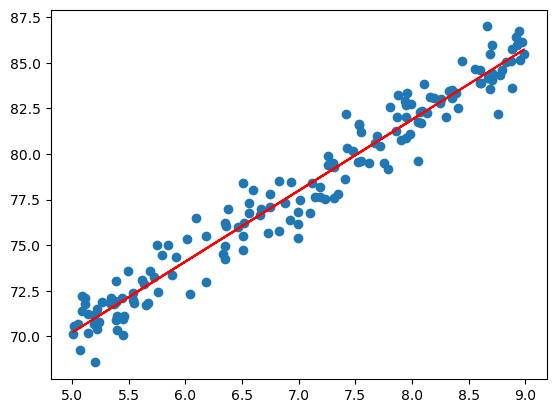

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

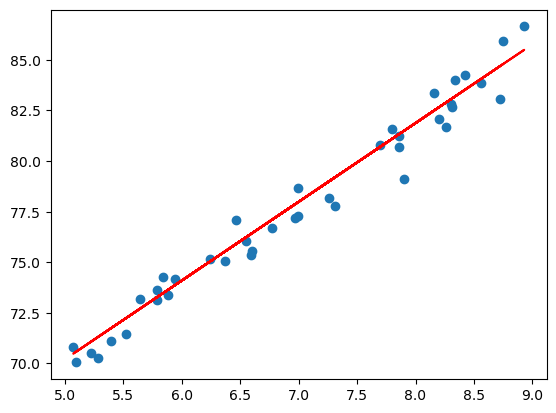

In [35]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

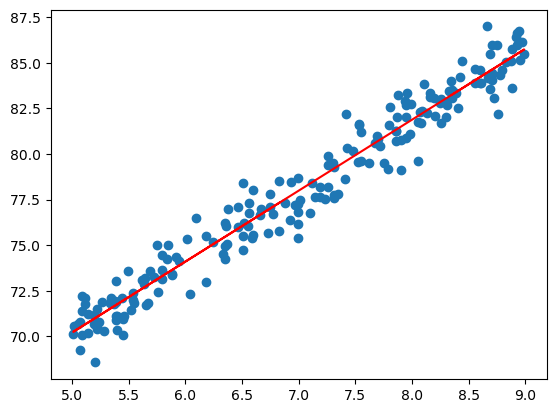

In [36]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")